# 07. 셋 이상 집단의 모평균 비교

t-검정은 2개의 서로 다른 모집단의 평균 차이를 검정할 때 사용할 수 있는 방법. 
집단이 3개 이상일 경우의 모평균 비교에는 t-검정 사용 불가. 
이러한 경우 **분산분석(Analysis of Variance)** 을 사용 - 관측값들이 달라지는 것을 여러 요인으로 나누어 각 요인들이 얼마나 변화의 정도에 기여하였는가를 분석하는 방법  

하나의 요인이라면 **일원배치 분산분석** , 두 요인이라면 **이원배치 분산분석** 이라 한다.  

## 1. 일원배치 분산분석

### 1-1. 일원배치 분산분석(One-way ANOAVA)
셋 이상의 집단의 모평균이 동일한지 검정할 수 있는 방법.   
요인이 1개인 경우 일원배치 분산분석이라고 함. 

* 분산분석(Analysis of Variance)
    1. 여러 모집단에서의 관측자료를 효과적으로 분석하고 해석하게 해 주는 분석 방법
    2. 관측값이 달라지는 것을 여러 요인으로 나눠서 각 요인들이 얼마나 변화의 정도에 기여하였는가를 분석함  
    
참고) https://ysyblog.tistory.com/174 / https://digital-play.tistory.com/80

일원배치 분산분석을 위해 관측값을 분해해야 하는데, **관측값 = 총평균 + 처리에 의한 편차 + 잔차** 로 구성된다.  



* 가설검정방법
    1. 귀무가설: H0, 모집단의 평균들이 모두 동일 (u1 = u2 = ... = ul)
    2. 대립가설: H1, 모든 Hi가 동일한 것은 아니다.  
    3. 평균처리제곱(MST)의 크고 작음에 따라 귀무가설의 기각여부를 결정한느데 그 기준으로 공통분산의 추정값인 평균오차제곱(MSE)를 사용함.   



    
    
* 사후 분석이 필요한 이유
    1. 검정통계량에 의해 귀무가설이 기각되었을 경우 어떤 집단간 평균이 유의미하게 차이가 나는지 확인할 필요가 있음 (사후 분석)
    2. Turkey's HSD 검정, 본페로니 검정 등의 방법이 있음. 
    3. 집단별로 사례수가 동일하면 Turkey's HSD 검정을 사용하고, 동일하지 않다면 본페로니 검정을 사용. 
    
    
빵을 만들 때 넣는 첨가물의 종류(A, B, C)에 따른 빵의 밀도 변화를 측정한 자료를 바탕으로   
- 귀무가설: 첨가물의 종류에 따른 빵의 평균 밀도에는 차이가 없다.  
- 대립가설: 적어도 1가지 첨가물을 넣은 빵의 평균 밀도가 다른 첨가물을 넣은 빵의 평균밀도와 차이가 있다.  

In [1]:
data = {'x':[0.95, 0.86, 0.71, 0.72, 0.74,
            0.71, 0.85, 0.62, 0.72, 0.64,
            0.69, 0.68, 0.51, 0.63, 0.44],
       'group': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]}
data

{'x': [0.95,
  0.86,
  0.71,
  0.72,
  0.74,
  0.71,
  0.85,
  0.62,
  0.72,
  0.64,
  0.69,
  0.68,
  0.51,
  0.63,
  0.44],
 'group': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]}

In [2]:
import pandas as pd
Data = pd.DataFrame(data)
Data

,x,group
0,0.95,1
1,0.86,1
2,0.71,1
3,0.72,1
4,0.74,1
5,0.71,2
6,0.85,2
7,0.62,2
8,0.72,2
9,0.64,2


In [3]:
X1 = Data.loc[Data.group==1, 'x']
X2 = Data.loc[Data.group==2, 'x']
X3 = Data.loc[Data.group==3, 'x']

### 1-2. 정규성 확인
일원분산분석을 할 때도 정규성 확인이 필요

In [4]:
from scipy.stats import shapiro, levene, bartlett

In [5]:
shapiro(X1)

ShapiroResult(statistic=0.8469260334968567, pvalue=0.18499600887298584)

In [6]:
shapiro(X2)

ShapiroResult(statistic=0.9071149826049805, pvalue=0.4504486918449402)

In [7]:
shapiro(X3)

ShapiroResult(statistic=0.8832945823669434, pvalue=0.32450810074806213)

X1, X2, X3 모두 p-value > 0.05로 정규성을 만족하는 것으로 확인됨.  

### 1-3. 등분산 확인

다음으로 등분산검정을 수행해야 하는데 levene()함수 또는 bartlett()함수를 사용하여 확인해야 함.  

> levene(data1, data2, data3)  

> bartlett(data1, data2, data3)

In [8]:
levene(X1, X2, X3)

LeveneResult(statistic=0.11320754716981142, pvalue=0.8939076596969161)

levene's test 결과 p-value > 0.05로 등분산이 만족함을 알 수 있다.  

In [9]:
bartlett(X1, X2, X3)

BartlettResult(statistic=0.14900048391088347, pvalue=0.9282072494741611)

Bartlett's test 결과도 p-value > 0.05로 등분산성이 있는 것으로 확인되었음

참고) https://ruahneuma.tistory.com/entry/R로-등분산-검정Levene-Bartlett

### 1-4. ANOVA분석: f-oneway()

세 집단 이상의 평균차이를 검정하기 위해 f_oneway() 함수 사용

> f_oneway(data1, data2, data3)

In [10]:
import numpy as np

In [11]:
np.mean(X1)

0.796

In [12]:
np.mean(X2)

0.7080000000000001

In [13]:
np.mean(X3)

0.5900000000000001

In [14]:
np.std(X1)

0.09393614852653902

In [15]:
np.std(X2)

0.08084553172563094

In [16]:
np.std(X3)

0.0985900603509299

분산분석을 하기 전 각 데이터의 평균과 표준편차를 확인함.  

In [17]:
from scipy.stats import f_oneway

In [18]:
result = f_oneway(X1, X2, X3)
result

F_onewayResult(statistic=5.11196172248804, pvalue=0.024783525296823965)

일원분산분석 결과 F검정 통계량은 5.11196, p-value는 0.02478로 p-value < 0.05로 귀무가설이 기각되고 대립가설이 채택되어 빵을 만들 때 넣는 첨가물의 종류에 따라 적어도 1가지는 빵의 평균 밀도에 통계적으로 유의한 차이가 있다는 것을 의미한다.  

## 2. 사후분석

f_oneway() 함수를 이용한 ANOVA분석은 각 집단별로 차이가 있는지 여부만 확인할 수 있을 뿐, 어떤 집단과 어떤 집단에 차이가 있는지 확인 불가

statsmodels.formula.api 모듈을 활용하면 연수형 변수인 반응변수와 그룹변수인 요인을 활용한 **회귀모형을 생성** 하여 이 모형을 이용한 분산분석표 및 가설검정을 확인하기 위한 함수에 적용하는 방식으로 분석을 수행할 수 있다.  

### 2-1. 회귀모형 생성
ols().fit()함수를 이용해 회귀모형 생성

> from statsmodels.formula.api import ols

> 객체명 = ols('반응변수 ~ 인자', data=DataFrame객체).fit()

> 객체명.summary()

**주의!!! 그룹 변수명이 문자형이 아닌 경우 입력시 유의사항**    
그룹 변수명이 연속형이거나 이산형인 경우 c()에 변수명을 넣어서 그룹변수가 범주형 자료로 인식하도록 변경시켜주어야 함.  


In [19]:
from statsmodels.formula.api import ols

In [20]:
lmFit = ols('x~C(group)', data=Data).fit()

In [21]:
lmFit.summary()

/Users/junhoahn/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.112
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0248
Time:                        20:59:29   Log-Likelihood:                 14.598
No. Observations:                  15   AIC:                            -23.20
Df Residuals:                      12   BIC:                            -21.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7960      0.046     17.412      0.000       0.696       0.896
C(group)[T.2]    -0.0880      0.065     -1.361      0.198      -0.229       0.053
C(group)[T.3]    -0.2060      0.065     -3.186      0.008      -0.347      -0.065
==============================================================================
Omnibus:                        2.016   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.023
Skew:                           0.213   Prob(JB):                        0.600
Kurtosis:                       1.794   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

만약 C()를 통하여 group변수를 범주형으로 변환하지 않으면 아래와 같이 하나의 group에 대한 coef만 얻을 수 있다. (값에 따라 구분되어 있지 않음)

In [22]:
wrongFit = ols('x~group', data=Data).fit()
wrongFit.summary()

/Users/junhoahn/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     10.93
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00568
Time:                        20:59:29   Log-Likelihood:                 14.553
No. Observations:                  15   AIC:                            -25.11
Df Residuals:                      13   BIC:                            -23.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9040      0.067     13.434      0.000       0.759       1.049
group         -0.1030      0.031     -3.306      0.006      -0.170      -0.036
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.884
Skew:                           0.176   Prob(JB):                        0.643
Kurtosis:                       1.864   Cond. No.                         6.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2-2. 분산분석표 생성
생성된 ols객체에 anova_lm()함수를 적용

> from statsmodels.stats.anova import anova_lm(ols객체)

In [23]:
from statsmodels.stats.anova import anova_lm

In [24]:
table = anova_lm(lmFit)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,0.10684,0.05342,5.111962,0.024784
Residual,12.0,0.12540,0.01045,NaN,NaN


그룹의 요인이 3개이므로 자유도(df)가 3으로 나오고, 제곱합(sum_sq)이 0.10684여서 평균제곱합(mean_sq)가 0.05342로 나오는 것을 알 수 있다.  
검정통계량(F)의 값은 5.11962이며, p값은 0.024784로 f_oneway()함수를 사용했을 때와 동일한 값을 얻었음을 확인할 수 있다.  

### 2-3. 사후분석: 본페로니 방법
statmodels.sandbox.statsmulticomp모듈의 MultiComparison()함수 및 allpairtest()함수를 이용

> from statsmodels.sandbox.stats.multicomp import MultiComparison

> 객체명1 = MultiComparison(반응변수, 인자)  

> from scipy.stats import ttest_ind

> 객체명2 = 객체명1.allpairtest(ttest_ind, method='bonf')

> print(객체명2[0])


In [25]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [26]:
comp = MultiComparison(Data.x, Data.group)

In [27]:
from scipy.stats import ttest_ind

In [28]:
result = comp.allpairtest(ttest_ind, method='bonf')
result

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[1.42009389, 0.19335562],
         [3.0254885 , 0.01642174],
         [1.85099463, 0.10132186]]),
  array([False,  True, False]),
  array([0.58006686, 0.04926523, 0.30396558]),
  0.016952427508441503,
  0.016666666666666666),
 array([(1, 2, 1.4201, 0.1934, 0.5801, False),
        (1, 3, 3.0255, 0.0164, 0.0493,  True),
        (2, 3, 1.851 , 0.1013, 0.304 , False)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')]))

In [29]:
result[0]

group1,group2,stat,pval,pval_corr,reject
1,2,1.4201,0.1934,0.5801,False
1,3,3.0255,0.0164,0.0493,True
2,3,1.851,0.1013,0.304,False


결과를 확인하면 그룹1 - 그룹2, 그룹2 - 그룹3은 p-value > 0.05로 첨가물 종류에 따른 빵의 밀도 차이가 없다는 것을 알 수 있다.   
하지만 그룹1 - 그룹3은 p-value < 0.05로 귀무가설을 기각하고 대립가설(첨가물 종류에 따른 빵의 밀도차이가 있다.)을 채택한다.  

따라서 그룹1-그룹3으로 인해 3종류의 첨가물에 따른 빵의 밀도차이가 없다는 귀무가설이 기각되었음을 알 수 있다.  

### 2-4 사후분석: Tukey HSD 방법
statsmodels.stats.multicomp 모듈의 pairwise_tukeyhsd()함수 이용

> from statsmodels.stats.multicomp import pairwise_tukeyhsd

> 객체명1 = pairwise_tukeyhsd(반응변수, 인자, alpha = 유의수준)

> print(객체명1)

> print(객체명1.plot_simultaneous())

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [31]:
posthoc1 = pairwise_tukeyhsd(Data.x, Data.group, alpha=0.05)
posthoc1

In [32]:
print(posthoc1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.088 0.3907 -0.2605  0.0845  False
     1      3   -0.206 0.0199 -0.3785 -0.0335   True
     2      3   -0.118 0.2032 -0.2905  0.0545  False
----------------------------------------------------


본페로니 방법으로 사후검정한 결과와 동일하게 그룹1-그룹2, 그룹2-그룹3의 평균차이는 존재하지 않으나, 그룹1-그룹3의 평균차이는 존재하는 것으로 확인됨.  


Figure(720x432)


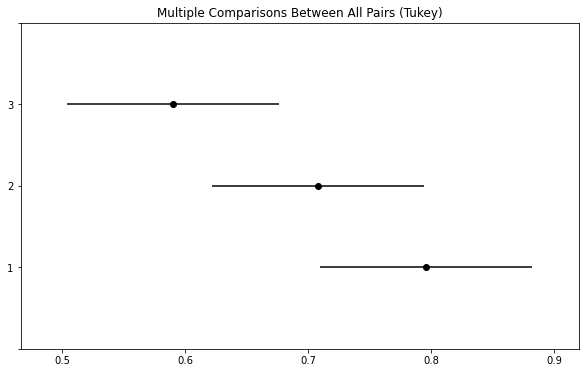

In [33]:
print(posthoc1.plot_simultaneous())

그룹1과 그룹3은 겹치는 X축 구간이 없음을 알 수 있다. 즉 두 그룹사이에 차이가 있음을 확인할 수 있다.  

## 실습

### [과제7-1] f_oneway()함수를 이용한 가설검정
* 연구가설: 붓꽃 종류(species)에 따라 꽃받침 너비(sepal_width)의 평균값에 차이가 있다. 
    1. 데이터 구성 및 결측값 확인
    2. 데이터 정규성 및 등분산 확인
    3. 평균과 표본편차 확인
    4. f_oneway()함수를 이용한 가설검정

#### 데이터 구성 및 결측값 확인

In [34]:
import seaborn as sns

In [35]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


결측값이 없음을 확인

#### 데이터 정규성 및 등분산 확인

종별로 3개의 데이터셋을 만들어 모평균을 비교

In [37]:
Sepcies_Set = df.loc[df.species == 'setosa', 'sepal_width']
Sepcies_Set.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

In [38]:
Sepcies_Ver = df.loc[df.species == 'versicolor', 'sepal_width']
Sepcies_Ver.head()

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
Name: sepal_width, dtype: float64

In [39]:
Sepcies_Vir = df.loc[df.species == 'virginica', 'sepal_width']
Sepcies_Vir.head()

100    3.3
101    2.7
102    3.0
103    2.9
104    3.0
Name: sepal_width, dtype: float64

In [40]:
shapiro(Sepcies_Set)

ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)

In [41]:
shapiro(Sepcies_Ver)

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

In [42]:
shapiro(Sepcies_Vir)

ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)

shapiro 검정결과 모두 p-value > 0.05로 정규성을 가진다는 귀무가설을 채택.   
즉 모든 데이터셋은 정규성을 가지고 있음.  


In [43]:
levene(Sepcies_Set, Sepcies_Ver, Sepcies_Vir)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

levene's test 결과 p-value > 0.05로 분산이 동질성을 가진다는 귀무가설을 채택.   
즉 모든 데이터셋은 등분산임.  

In [44]:
bartlett(Sepcies_Set, Sepcies_Ver, Sepcies_Vir)

BartlettResult(statistic=2.0910752014391774, pvalue=0.35150280041581317)

Bartlett'test 결과도 Levene's test 결과와 동일하게 p-value > 0.05로 분산이 동질성을 가진다는 귀무가설을 채택.   
즉 모든 데이터셋은 등분산임을 재확인.   

#### 평균과 표본편차 확인

In [45]:
np.mean(Sepcies_Set)

3.428000000000001

In [46]:
np.mean(Sepcies_Ver)

2.7700000000000005

In [47]:
np.mean(Sepcies_Vir)

2.9739999999999998

In [48]:
np.std(Sepcies_Set)

0.3752545802518604

In [49]:
np.std(Sepcies_Ver)

0.31064449134018135

In [50]:
np.std(Sepcies_Vir)

0.319255383666431

#### f_oneway()함수를 이용한 가설검정

In [51]:
result = f_oneway(Sepcies_Set, Sepcies_Ver, Sepcies_Vir)
result

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

One-way ANOVA 결과 p-value < 0.05로 귀무가설을 기각하고 대립가설(H1: 종별로 꽃받침 너비 평균에 차이가 있다.)를 채택한다.   


### [과제7-2] statsmodel 모듈을 활용한 가설검정 및 사후 분석

1. 회귀모형적합
2. 분산분석표 작성
3. 사후분석: Bonferoni 방법 or TukeyHSD 방법
4. 그래프를 통한 사후 분석 결과 확인

#### 회귀모형적합

In [52]:
lmFit = ols('sepal_width~C(species)', data=df).fit()
lmFit

In [53]:
lmFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.49e-17
Time:                        20:59:30   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.4280      0.048     71.359      0.000       3.333       3.523
C(species)[T.versicolor]    -0.6580      0.068     -9.685      0.000      -0.792      -0.524
C(species)[T.virginica]     -0.4540      0.068     -6.683      0.000      -0.588      -0.320
==============================================================================
Omnibus:                        1.920   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.632
Skew:                           0.027   Prob(JB):                        0.442
Kurtosis:                       3.508   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 분산분석표 작성

In [54]:
table = anova_lm(lmFit)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(species),2.0,11.344933,5.672467,49.16004,4.492017e-17
Residual,147.0,16.962000,0.115388,NaN,NaN


검정통계량(F)의 값은 49.16004이며, p값은 4.49e-17로 f_oneway()함수를 사용했을 때와 동일한 값을 얻었음을 확인할 수 있다.

#### 사후분석: Bonferoni 방법 or TukeyHSD 방법

In [55]:
comp = MultiComparison(df.sepal_width, df.species)

In [56]:
result = comp.allpairtest(ttest_ind, method='bonf')
result

(<class 'statsmodels.iolib.table.SimpleTable'>,
 (array([[ 9.45497585e+00,  1.84525995e-15],
         [ 6.45034909e+00,  4.24635538e-09],
         [-3.20576075e+00,  1.81910042e-03]]),
  array([ True,  True,  True]),
  array([5.53577984e-15, 1.27390661e-08, 5.45730127e-03]),
  0.016952427508441503,
  0.016666666666666666),
 array([('setosa', 'versicolor',  9.455 , 0.    , 0.    ,  True),
        ('setosa', 'virginica',  6.4503, 0.    , 0.    ,  True),
        ('versicolor', 'virginica', -3.2058, 0.0018, 0.0055,  True)],
       dtype=[('group1', 'O'), ('group2', 'O'), ('stat', '<f8'), ('pval', '<f8'), ('pval_corr', '<f8'), ('reject', '?')]))

In [57]:
result[0]

group1,group2,stat,pval,pval_corr,reject
setosa,versicolor,9.455,0.0,0.0,True
setosa,virginica,6.4503,0.0,0.0,True
versicolor,virginica,-3.2058,0.0018,0.0055,True


Bonferoni 방법으로 확인한 결과 모든 그룹간 꽃받침 너비의 평균은 차이를 가지는 것으로 확인되었다.  


In [58]:
posthoc2 = pairwise_tukeyhsd(df.sepal_width, df.species, alpha=0.05)
posthoc2

In [59]:
print(posthoc2)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


TukeyHSD 방법으로 확인한 결과도 Bonferoni 방법으로 확인한 결과와 동일하게 모든 그룹간 p-value가 0.05 미만으로 귀무가설을 기각하여 모평균간 차이가 있다는 대립가설을 채택하게 된다.   

#### 그래프를 통한 사후 분석 결과 확인

Figure(720x432)


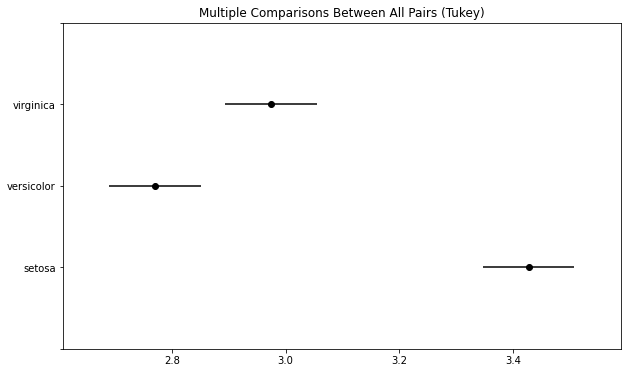

In [60]:
print(posthoc2.plot_simultaneous())

모든 그룹이 겹치는 sepal_width(X축)이 없기 때문에 종별 꽃받침 너비의 평균은 차이가 있다는 결론을 재확인할 수 있다.  